In [1071]:
import os
import warnings
warnings.simplefilter('ignore')

In [1072]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [1073]:
dataset= pd.read_csv(r'G:\kani\hacker earth\attrition rate\Dataset\Train.csv')

dataset

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,EID_16328,F,23.0,5,Married,Franklin,Operarions,Behavioral,4.0,1,...,type3,3.0,1,0.7516,-0.4537,2.0,3,7,3,0.7839
6996,EID_8387,F,44.0,1,Married,Lebanon,R&D,Analytical,16.0,2,...,type3,3.0,2,-0.1048,-2.7762,2.0,4,8,4,0.1055
6997,EID_8077,F,49.0,3,Single,Springfield,IT,Directive,10.0,1,...,type2,4.0,2,-0.1048,-0.4537,2.0,4,8,3,0.7847
6998,EID_19597,F,47.0,3,Married,Washington,Sales,Behavioral,24.0,1,...,type0,2.0,4,0.7516,1.8688,2.0,3,6,3,0.4162


In [1074]:
def missing_values(data):
    nullvalues=data.isnull().any()
    nv=data[data.columns[nullvalues]]
    nv_col=nv.columns
    imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
    imputer=imputer.fit(nv)
    nv=imputer.transform(nv)
    nnv=pd.DataFrame(nv,columns=nv_col)
    data[nv_col]=nnv
    data
    return data
     


In [1075]:
dataset=missing_values(dataset)
dataset


,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.000000,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.000000,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.000000,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,1.891078,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.000000,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,EID_16328,F,23.0,5,Married,Franklin,Operarions,Behavioral,4.0,1,...,type3,3.0,1,0.7516,-0.4537,2.000000,3,7,3,0.7839
6996,EID_8387,F,44.0,1,Married,Lebanon,R&D,Analytical,16.0,2,...,type3,3.0,2,-0.1048,-2.7762,2.000000,4,8,4,0.1055
6997,EID_8077,F,49.0,3,Single,Springfield,IT,Directive,10.0,1,...,type2,4.0,2,-0.1048,-0.4537,2.000000,4,8,3,0.7847
6998,EID_19597,F,47.0,3,Married,Washington,Sales,Behavioral,24.0,1,...,type0,2.0,4,0.7516,1.8688,2.000000,3,6,3,0.4162


In [1076]:
def ordinal(data):
    ordinal=data[['Gender','Relationship_Status','Hometown','Unit','Decision_skill_possess','Compensation_and_Benefits']]
    ordinal_encoder=OrdinalEncoder()
    ordinal_encoder=ordinal_encoder.fit(ordinal)
    ordinal=ordinal_encoder.transform(ordinal)
    od=pd.DataFrame(ordinal,columns=['Gender','Relationship_Status','Decision_skill_possess','Hometown','Unit','Compensation_and_Benefits'])
    data[od.columns]=od
    return data

In [1077]:
dataset=ordinal(dataset)
dataset=dataset.set_index(['Employee_ID'])

In [1078]:
dataset=dataset.drop(['VAR1','VAR2','VAR3','VAR4','VAR5','VAR6','VAR7'],axis=1)
dataset

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,Attrition_rate
Employee_ID,,,,,,,,,,,,,,,,
EID_23371,0.0,42.0,4,0.0,2.0,2.0,1.0,4.0,4,33,1,1,7.0,2.0,3.0,0.1841
EID_18000,1.0,24.0,3,1.0,3.0,0.0,3.0,5.0,4,36,0,3,6.0,2.0,4.0,0.0670
EID_3891,0.0,58.0,3,0.0,8.0,2.0,0.0,27.0,3,51,0,2,8.0,2.0,1.0,0.0851
EID_17492,0.0,26.0,3,1.0,1.0,1.0,2.0,4.0,3,56,1,3,8.0,2.0,1.0,0.0668
EID_22534,0.0,31.0,1,0.0,3.0,2.0,3.0,5.0,4,62,1,3,2.0,3.0,3.0,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EID_16328,0.0,23.0,5,0.0,5.0,1.0,1.0,4.0,1,20,1,2,6.0,3.0,3.0,0.7839
EID_8387,0.0,44.0,1,0.0,9.0,0.0,2.0,16.0,2,59,0,2,4.0,3.0,3.0,0.1055
EID_8077,0.0,49.0,3,1.0,2.0,3.0,3.0,10.0,1,59,1,2,3.0,2.0,4.0,0.7847


In [1079]:
x=dataset['Age']
y=dataset['Attrition_rate']


In [1080]:
dataset.columns

Index(['Gender', 'Age', 'Education_Level', 'Relationship_Status', 'Hometown',
       'Unit', 'Decision_skill_possess', 'Time_of_service',
       'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level',
       'Pay_Scale', 'Compensation_and_Benefits', 'Work_Life_balance',
       'Attrition_rate'],
      dtype='object')

In [1081]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [1082]:
x=dataset.iloc[:,0:-1]
y=dataset[["Attrition_rate"]]
y.describe()

,Attrition_rate
count,7000.000000
mean,0.189376
std,0.185753
min,0.000000
25%,0.070400
50%,0.142650
75%,0.235000
max,0.995900


In [1083]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
ytrain.dtypes

Attrition_rate    float64
dtype: object

In [1084]:
lm=LinearRegression(normalize=True)
lm.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [1085]:
print(lm.intercept_)

[0.17676021]


In [1086]:
print(lm.coef_)

[[ 1.11551740e-02 -9.05387882e-05 -1.31974588e-03  3.54503191e-03
   1.36446906e-03  2.98521498e-03  1.15715488e-03 -2.36686436e-04
   2.76787395e-03  1.68953954e-04 -3.93259995e-03  2.76570477e-03
  -1.28418707e-03 -6.57123058e-03  3.45156848e-03]]


In [1087]:
y_pred=lm.predict(xtest)
y_pred

array([[0.17557098],
       [0.17896145],
       [0.21067578],
       ...,
       [0.21474107],
       [0.16540824],
       [0.15572765]])

In [1088]:
from math import sqrt
def score(a,b):
    rmse = np.sqrt((1/len(a)) * sum((a-b)**2))
    return 1-rmse

In [1089]:
y_test=ytest.iloc[:]

In [1090]:
from sklearn.metrics import mean_squared_error

100*1-mean_squared_error(y_test,y_pred)

99.96469496506032

In [1091]:
test=pd.read_csv(r'G:\kani\hacker earth\attrition rate\Dataset\Test.csv')
test[test.columns[test.isnull().any()]]

,Age,Time_of_service,Pay_Scale,Work_Life_balance,VAR2,VAR4
0,32.0,7.0,4.0,1.0,-0.9612,2.0
1,65.0,41.0,1.0,1.0,-0.9612,1.0
2,52.0,21.0,8.0,1.0,-0.1048,2.0
3,50.0,11.0,2.0,4.0,-0.1048,2.0
4,44.0,12.0,2.0,4.0,1.6081,2.0
...,...,...,...,...,...,...
2995,32.0,3.0,6.0,2.0,-0.1048,1.0
2996,NaN,10.0,9.0,1.0,0.7516,3.0
2997,60.0,35.0,9.0,3.0,-1.8176,NaN
2998,51.0,23.0,6.0,1.0,0.7516,2.0


In [1092]:
test=missing_values(test)
test

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,32.000000,5,Single,Springfield,R&D,Conceptual,7.0,4,...,4.0,type2,1.0,3,-0.9612,-0.4537,2.000000,1,8,4
1,EID_9658,M,65.000000,2,Single,Lebanon,IT,Directive,41.0,2,...,1.0,type2,1.0,4,-0.9612,0.7075,1.000000,2,8,2
2,EID_22203,M,52.000000,3,Married,Springfield,Sales,Directive,21.0,3,...,8.0,type3,1.0,4,-0.1048,0.7075,2.000000,1,9,3
3,EID_7652,M,50.000000,5,Single,Washington,Marketing,Analytical,11.0,4,...,2.0,type0,4.0,3,-0.1048,0.7075,2.000000,2,8,3
4,EID_6516,F,44.000000,3,Married,Franklin,R&D,Conceptual,12.0,4,...,2.0,type2,4.0,4,1.6081,0.7075,2.000000,2,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,EID_22547,F,32.000000,3,Single,Franklin,Sales,Directive,3.0,3,...,6.0,type2,2.0,1,-0.1048,0.7075,1.000000,4,7,4
2996,EID_10066,F,39.797816,2,Single,Franklin,Marketing,Conceptual,10.0,2,...,9.0,type2,1.0,3,0.7516,0.7075,3.000000,4,8,3
2997,EID_7126,F,60.000000,4,Single,Lebanon,Logistics,Analytical,35.0,1,...,9.0,type3,3.0,3,-1.8176,-0.4537,1.907476,4,8,4
2998,EID_4929,F,51.000000,1,Married,Springfield,IT,Behavioral,23.0,1,...,6.0,type3,1.0,5,0.7516,-0.4537,2.000000,3,9,2


In [1093]:
test=ordinal(test)
test

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,0.0,32.000000,5,1.0,9.0,2.0,3.0,7.0,4,...,4.0,2.0,1.0,3,-0.9612,-0.4537,2.000000,1,8,4
1,EID_9658,1.0,65.000000,2,1.0,2.0,3.0,2.0,41.0,2,...,1.0,2.0,1.0,4,-0.9612,0.7075,1.000000,2,8,2
2,EID_22203,1.0,52.000000,3,0.0,10.0,3.0,3.0,21.0,3,...,8.0,3.0,1.0,4,-0.1048,0.7075,2.000000,1,9,3
3,EID_7652,1.0,50.000000,5,1.0,4.0,0.0,4.0,11.0,4,...,2.0,0.0,4.0,3,-0.1048,0.7075,2.000000,2,8,3
4,EID_6516,0.0,44.000000,3,0.0,9.0,2.0,1.0,12.0,4,...,2.0,2.0,4.0,4,1.6081,0.7075,2.000000,2,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,EID_22547,0.0,32.000000,3,1.0,10.0,3.0,1.0,3.0,3,...,6.0,2.0,2.0,1,-0.1048,0.7075,1.000000,4,7,4
2996,EID_10066,0.0,39.797816,2,1.0,4.0,2.0,1.0,10.0,2,...,9.0,2.0,1.0,3,0.7516,0.7075,3.000000,4,8,3
2997,EID_7126,0.0,60.000000,4,1.0,3.0,0.0,2.0,35.0,1,...,9.0,3.0,3.0,3,-1.8176,-0.4537,1.907476,4,8,4
2998,EID_4929,0.0,51.000000,1,0.0,2.0,1.0,3.0,23.0,1,...,6.0,3.0,1.0,5,0.7516,-0.4537,2.000000,3,9,2


In [1094]:
test=test.set_index(['Employee_ID'])
test=test.drop(['VAR1','VAR2','VAR3','VAR4','VAR5','VAR6','VAR7'],axis=1)

In [1095]:
test_pred=lm.predict(test)

In [1096]:
test_pred=map(float,test_pred)

In [1097]:

emp_id = list(test.index)
test_pred=list(test_pred)
dict = {"Employee_ID": emp_id, "Attrition_rate": test_pred}


In [1098]:
sub = pd.DataFrame(dict)
sub.to_csv("submit.csv", index=False)

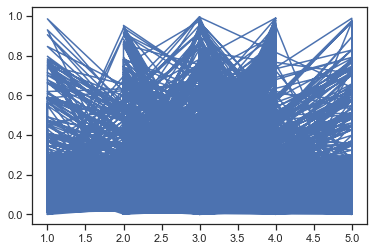

In [840]:
plt.plot('VAR1','Attrition_rate',data=dataset)

In [842]:
sorted=dataset.sort_values(by='Attrition_rate')

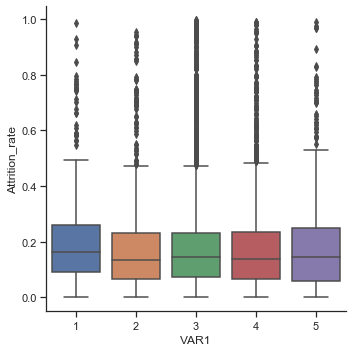

In [847]:
sns.catplot('VAR1','Attrition_rate',kind='box',data=sorted)